# Data Mining (KEN4113) #
## Lab 3: Classification ##

Konstantin Sandfort
i6255681

In [94]:
# Imports
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [105]:
# Import data

# Training Data
X = pd.read_csv('caravan.csv')
y = X.iloc[:, -1]
X = X.drop(columns=['CARAVAN POLICY'])

pd.set_option('display.max_columns', None)

In [108]:
# --- Step 1: Preprocessing ---

# One-hot-encoding of l0 and l2
def ohe(df, col_name, label):
    cols = pd.get_dummies(df,
                          prefix=label,
                          dtype=int,
                          columns=[col_name],
                          drop_first=False)
    return cols

X_ohe = ohe(X, 'Customer Subtype', 'l0')
X_ohe = ohe(X_ohe, 'Customer main type', 'l2')

# Standardize data (scaling and centering)
X_ohe_std = preprocessing.StandardScaler().fit_transform(X_ohe)

In [109]:
# Model validation
# Source: https://medium.com/analytics-vidhya/model-validation-for-classification-5ff4a0373090
def display_confusion_matrix(y_actual, y_pred):
    matrix = confusion_matrix(y_pred, y_actual)
    
    matrix = pd.DataFrame(matrix, columns=['Actually No Caravan Insurance', 'Actually Caravan Insurance'], 
                                     index=['Predict No Caravan Insurance', 'Predict Caravan Insurance'])
    sns.heatmap(matrix, annot=True, cmap='magma', fmt='d')

In [110]:
# Split data into training-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X_ohe_std, y, test_size=0.5, random_state=0)

Model 1 accuracy score: 0.9361044314668499


C:\Users\K-San\PycharmProjects\data_mining_course\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


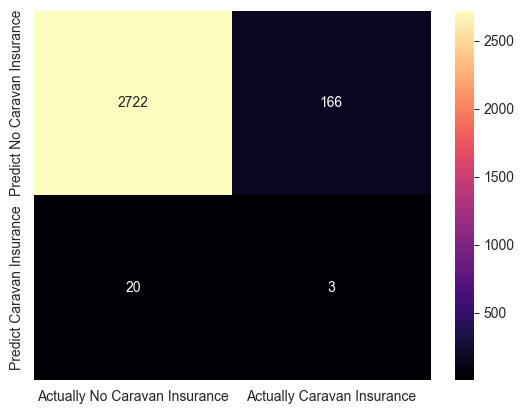

In [111]:
# Model 1: Logistical Regression with all features

log_reg_v1_model = LogisticRegression(verbose=False, penalty=None)
log_reg_v1_model.fit(X=X_train, y=y_train)
pred_1 = log_reg_v1_model.predict(X_test)
score_1 = log_reg_v1_model.score(X=X_test, y=y_test)
print(f'Model 1 accuracy score: {score_1}')

display_confusion_matrix(y_test, pred_1)

['Protestant', 'Other religion', 'Married', 'Living together', 'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status', 'Middle Management', 'Skilled labourers', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', '1 car', '2 cars', 'No car', 'National Health Service', 'Income < 30.000', 'Income 75-122.000', 'Income >123.000', 'Average income', 'Contribution third party insurance (firms)', 'Contribution family accidents insurance policies', 'Contribution fire policies', 'Contribution property insurance policies', 'Number of third party insurance (firms)', 'Number of agricultural machines policies', 'Number of family accidents insurance policies', 'Number of disability insurance policies', 'Number of re policies', 'Number of boat policies']
Model 2 accuracy score: 0.6660941257299897


C:\Users\K-San\PycharmProjects\data_mining_course\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


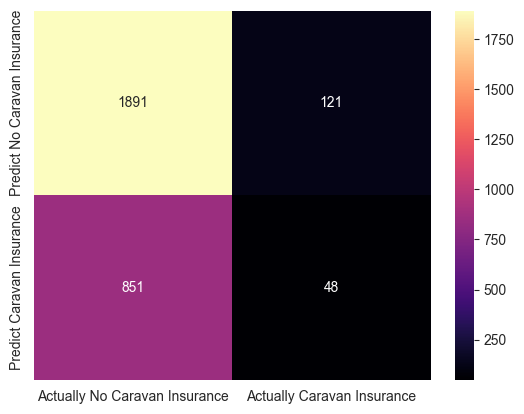

In [112]:
# --- Step 2: Feature Selection
# Univariate Feature Selection

def univariate_feature_selection(df, y, k_f):
    selector = SelectKBest(f_classif, k=k_f)
    selected = selector.fit_transform(df, y)
    selector.get_support()
    selected_features_mask = selector.get_support()
    f_names = X.columns
    col_names = [feature for feature, selected in zip(f_names, selected_features_mask) if selected]
    return selected, col_names

X_train_ufs, col_names_train = univariate_feature_selection(X_train, y_train, 40)
X_test_ufs, col_names_test = univariate_feature_selection(X_test, y_test, 40)

log_reg_v2_model = LogisticRegression(verbose=False, penalty=None)
log_reg_v2_model.fit(X=X_train_ufs, y=y_train)
prediction_2 = log_reg_v2_model.predict(X_test_ufs)

print(col_names_train)


score_2 = log_reg_v2_model.score(X=X_test_ufs, y=y_test)
print(f'Model 2 accuracy score: {score_2}')

display_confusion_matrix(y_test, prediction_2)

In [ ]:
# Recursive Feature Selection

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
X_rfs = selector.fit_transform(X, y)
selected_features_mask = selector.get_support()
f_names = X.columns
col_names = [feature for feature, selected in zip(f_names, selected_features_mask) if selected]
print(col_names)


KeyboardInterrupt



Score 3: 0.9069048436963243
0.9069048436963243


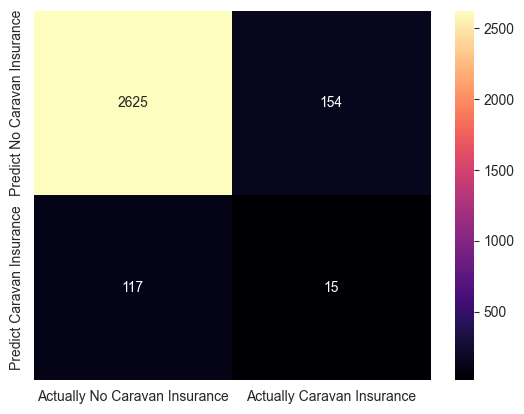

In [83]:
# Decision Tree Classification
# We use the original OHE data because the tree itself does feature selection
tree_model = tree.DecisionTreeClassifier(max_depth=12)
tree_model = tree_model.fit(X_train, y_train)
prediction_3 = tree_model.predict(X_test)
score_3 = tree_model.score(X_test, y_test)
print(f'Score 3: {score_3}')
display_confusion_matrix(y_test, prediction_3)
print(tree_model.score(X_test, y_test))

C:\Users\K-San\PycharmProjects\data_mining_course\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\K-San\PycharmProjects\data_mining_course\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

Score 4: 0.935


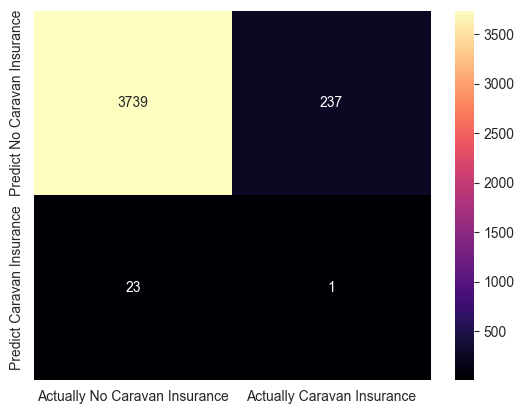

In [8]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(ufs_train, y_train)
prediction_4 = knn_model.predict(ufs_test)
score_4 = knn_model.score(ufs_test, y_test)
print(f'Score 4: {score_4}')
display_confusion_matrix(y_test, prediction_4)

0.9405


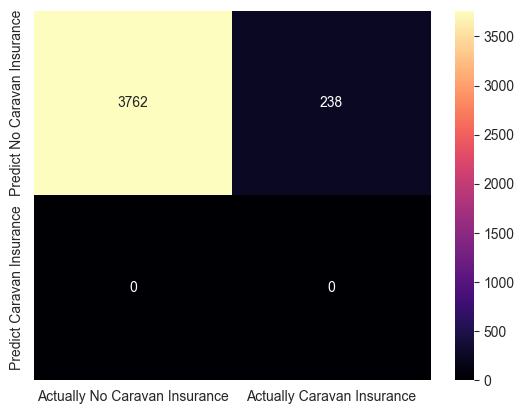

In [13]:
# Naive Bayes model - very poor performance
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(data_train_ohe, y_train)
prediction_5 = naive_bayes_model.predict(data_test_ohe)
score_5 = naive_bayes_model.score(data_test_ohe, y_test)
print(score_5)
display_confusion_matrix(y_test, prediction_5)

0.80725


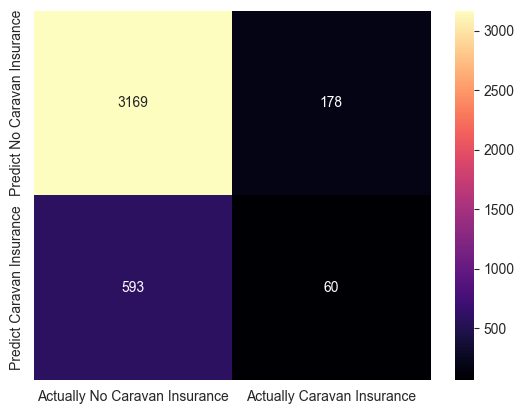

In [52]:
clf = GradientBoostingClassifier(n_estimators=4, learning_rate=0.97, max_depth=50, random_state=0)
clf.fit(ufs_train, y_train)
score_6 = clf.score(ufs_test, y_test)
prediction_6 = clf.predict(ufs_test)
display_confusion_matrix(y_test, prediction_6)
print(score_6)

In [ ]:
# Get predictions from the final model

data_test_final = pd.read_csv('caravanTest.csv')
y_test_final = data_test_final.iloc[:, -1]
data_test_final = data_test_final.drop(columns=['CARAVAN POLICY'])